In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

In [7]:
df = pd.read_csv('bpvnp_by_material.csv', delimiter='|')
df['win_rate'] = df['wins'] / df[['wins','draws','losses']].sum(axis=1)
df['draw_rate'] = df['draws'] / df[['wins','draws','losses']].sum(axis=1)
df['average_points'] = df['win_rate'] + 0.5 * df['draw_rate']
df

,material,wins,draws,losses,win_rate,draw_rate,average_points
0,33,7934,602,6474,0.528581,0.040107,0.548634
1,32,13328,991,10585,0.535175,0.039793,0.555071
2,31,4422,310,3421,0.542377,0.038023,0.561388
3,30,646,41,521,0.534768,0.033940,0.551738
4,29,60,5,61,0.476190,0.039683,0.496032
5,28,4817,658,4822,0.467806,0.063902,0.499757


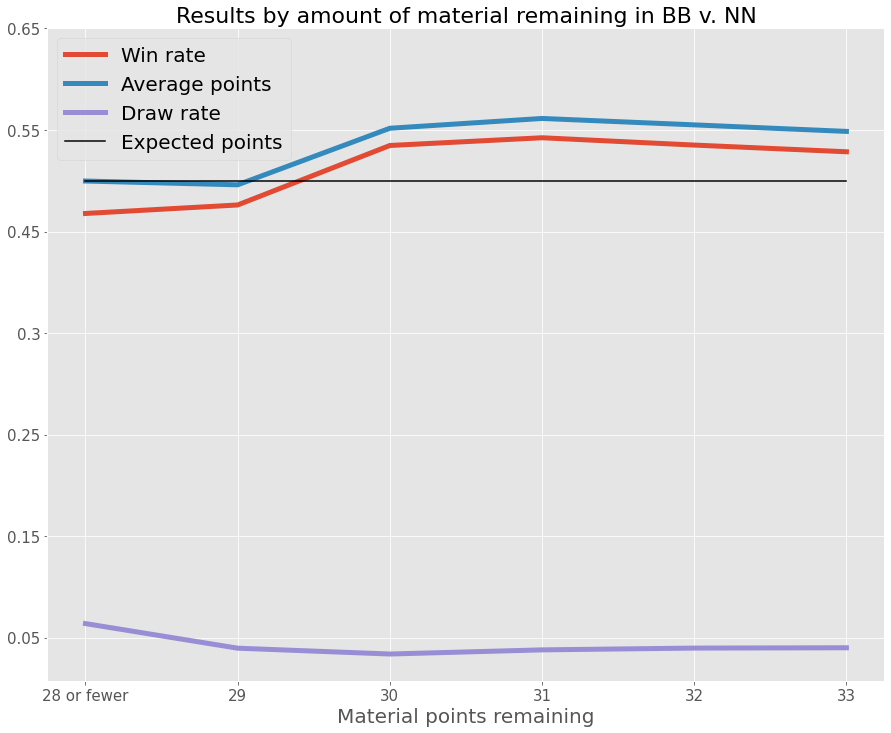

In [40]:
fig, ax = plt.subplots(figsize=(15,12))

ax.plot(df['material'], df['win_rate'], linewidth=5)
ax.plot(df['material'], df['average_points'], linewidth=5)
ax.plot(df['material'], df['draw_rate'], linewidth=5)
ax.plot([28, 33], [0.5, 0.5], color='black')

ax.set_title('Results by amount of material remaining in BB v. NN', fontsize=22)

ax.legend(['Win rate','Average points','Draw rate','Expected points'],
            prop={'size': 20})

ax.set_xlabel('Material points remaining', fontsize=20)

ax.set_xticks(np.arange(28, 34))
ax.set_xticklabels(['28 or fewer','29','30','31','32','33'],
                    fontdict={'fontsize': 15});

ax.set_yticks(np.arange(0.05, 0.75, 0.1))
ax.set_yticklabels(['0.05','0.15','0.25','0.3','0.45','0.55','0.65'],
                    fontdict={'fontsize': 15})
                    
plt.savefig('../images/bbnn_by_material.png');